# Lecture 13: Resonance flourescence

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

## Introduction

$\displaystyle H_L = -\frac{\Omega}{2}(\sigma_+ + \sigma_-)$


$\displaystyle \frac{d}{dt}\rho = -i[H_L, \rho] + \gamma_0(N+1)\left(\sigma_-\rho(t)\sigma_+ - \frac{1}{2}\sigma_+\sigma_-\rho(t) - \frac{1}{2}\rho(t)\sigma_+\sigma_-\right) + \gamma_0 N \left(\sigma_+\rho(t)\sigma_- - \frac{1}{2}\sigma_-\sigma_+\rho(t) - \frac{1}{2}\rho(t)\sigma_-\sigma_+\right)$


### Problem definition in QuTiP

In [4]:
Omega = 1.0 * 2 * np.pi

In [5]:
gamma0 = 0.05
w_th = 0.0 
N = n_thermal(Omega, w_th)

In [8]:
def system_spec(Omega, gamma0, N):
    HL = -0.5 * Omega * (sigmap() + sigmam())
    c_ops = [np.sqrt(gamma0 * (N + 1)) * sigmam(), np.sqrt(gamma0 * N) * sigmap()]
    return HL, c_ops

In [9]:
HL, c_ops = system_spec(Omega, gamma0, N)

In [10]:
e_ops = [sigmax(), sigmay(), sigmaz(), sigmam(), sigmap(), num(2)]

In [11]:
psi0 = basis(2, 0)

In [14]:
tlist = np.linspace(0, 20/(2*np.pi), 200)
result = mesolve(HL, psi0, tlist, c_ops, e_ops)

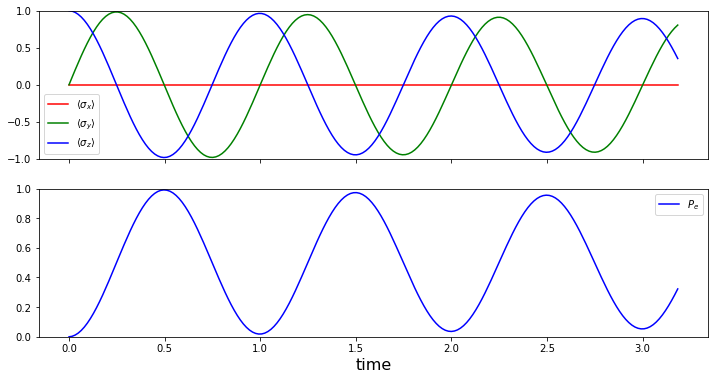

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(result.times, result.expect[0], 'r', label=r'$\langle\sigma_x\rangle$')
axes[0].plot(result.times, result.expect[1], 'g', label=r'$\langle\sigma_y\rangle$')
axes[0].plot(result.times, result.expect[2], 'b', label=r'$\langle\sigma_z\rangle$')
axes[0].legend()
axes[0].set_ylim(-1, 1);


axes[1].plot(result.times, result.expect[5], 'b', label=r'$P_e$')

#axes[1].set_ylabel(r'$\langle\sigma_z\rangle$', fontsize=16)
axes[1].set_xlabel("time", fontsize=16)
axes[1].legend()
axes[1].set_ylim(0, 1);

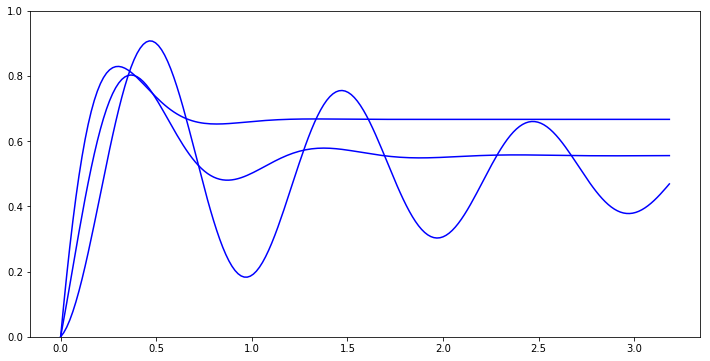

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)


for idx, gamma0 in enumerate([0.1 * Omega, 0.5 * Omega, 1.0 * Omega]):

    HL, c_ops = system_spec(Omega, gamma0, N)
    result = mesolve(HL, psi0, tlist, c_ops, e_ops)

    ax.plot(result.times, result.expect[5], 'b', label=r'$\langle\sigma_z\rangle$')

ax.set_ylim(0, 1);

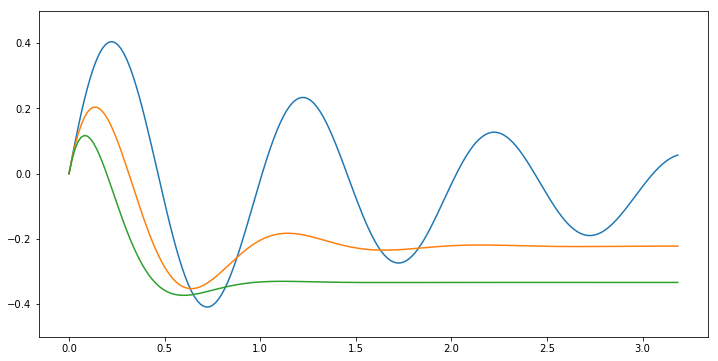

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)


for idx, gamma0 in enumerate([0.1 * Omega, 0.5 * Omega, 1.0 * Omega]):

    HL, c_ops = system_spec(Omega, gamma0, N)
    result = mesolve(HL, psi0, tlist, c_ops, e_ops)

    ax.plot(result.times, np.imag(result.expect[4]), label=r'im $\langle\sigma_+\rangle$')

ax.set_ylim(-.5, 0.5);

/home/rigel/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


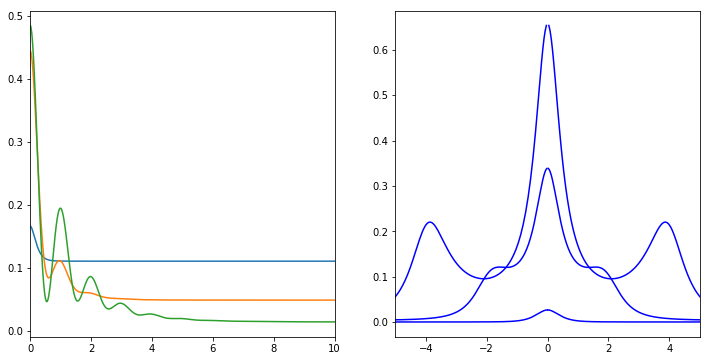

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

taulist = np.linspace(0, 100, 10000)

for idx, gamma0 in enumerate([2 * Omega, 0.5 * Omega, 0.25 * Omega]):

    HL, c_ops = system_spec(Omega, gamma0, N)
    corr_vec = correlation_2op_1t(HL, None, taulist, c_ops, sigmap(), sigmam())
    w, S = spectrum_correlation_fft(taulist, corr_vec)

    axes[0].plot(taulist, corr_vec, label=r'$<\sigma_+(\tau)\sigma_-(0)>$')
    axes[1].plot(-w / (gamma0), S, 'b', label=r'$S(\omega)$')
    axes[1].plot( w / (gamma0), S, 'b', label=r'$S(\omega)$')

axes[0].set_xlim(0, 10)
axes[1].set_xlim(-5, 5);

### Software versions

In [20]:
from qutip.ipynbtools import version_table; version_table()

Software,Version
QuTiP,4.1.0
Numpy,1.11.3
SciPy,0.18.1
matplotlib,2.0.0
Cython,0.25.2
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,5.1.0
Python,"2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 20 2016, 23:09:15) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]"
OS,posix [linux2]
